## Tema pentru acasa nr. 6
In aceasta tema pentru acasa va trebui sa incarcati un set de date, sa verificati daca exista valor care trebuie omise, prelucrate, etc. Apoi, avand separate X si y -> preziceti valoarea lui y si calculati acuratetea prezicerilor.

Importam librariile necesare pentru efectuarea sarcinilor din aceasta lectie. 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, classification_report, accuracy_score, confusion_matrix, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

Descarcam setul de date din repozitoria cursului:

In [ ]:
!rm -rf data && mkdir data && curl -o data/datatest.txt -LJO https://github.com/dianaartiom/machine_learning_with_python/raw/main/lesson06/notebooks/data/datatest.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  196k  100  196k    0     0   228k      0 --:--:-- --:--:-- --:--:-- 5712k


In aceasta tema pentru acasa se va lucra cu un set de date care descrie daca odaile dintr-ul oficiu sunt ocupate sau nu (coloana *occupancy*) in dependenta de informatie precum temperatura camerei, umeditatea, luminozitatea, umiditatea, cantitatea de CO2 in acea camera.

Attribute Information:

- date time year-month-day hour:minute:second
- Temperature, in Celsius
- Relative Humidity, %
- Light, in Lux
- CO2, in ppm
- Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air
- Occupancy, 0 or 1, 0 for not occupied, 1 for occupied status

Incarcam setul de date cu ajutorul *pandas.read_csv()*. Mai multe informatii despre setul de date pot fi gasite aici: https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

In [ ]:
# load data
occupancy_df = pd.read_csv('data/datatest.txt', sep = ',')
occupancy_df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


Eliminam coloana *date* din setul de date si transformam valorile categorice cu ajutorul metodei *pd.get_dummies()*.

In [ ]:
occupancy_df = occupancy_df.drop('date', axis = 1)
occupancy_df = pd.get_dummies(occupancy_df)

occupancy_df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,23.7000,26.272,585.200000,749.200000,0.004764,1
141,23.7180,26.290,578.400000,760.400000,0.004773,1
142,23.7300,26.230,572.666667,769.666667,0.004765,1
143,23.7225,26.125,493.750000,774.750000,0.004744,1
144,23.7540,26.200,488.600000,779.000000,0.004767,1


In [ ]:
occupancy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    2665 non-null   float64
 1   Humidity       2665 non-null   float64
 2   Light          2665 non-null   float64
 3   CO2            2665 non-null   float64
 4   HumidityRatio  2665 non-null   float64
 5   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 145.7 KB


Separa setul in date -> X si label -> y (coloana *Occupancy*):

In [ ]:
X = occupancy_df.loc[:, occupancy_df.columns != 'Occupancy']
y = occupancy_df[['Occupancy']]

Imparte setul de date in: date de antrenare si date pentru test cu ajutorul functiei *train_test_split* din modulul *sklearn.model_selection*.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

Cu ajutorul sklearn creeaza un *Pipeline* care contine un scaler si modelul de logisticRegression (vezi cum s-a facut in cadrul lectiei).

In [ ]:
scaler = StandardScaler()
lr = LogisticRegression()
model1 = Pipeline([('standardize', scaler),
                    ('log_reg', lr)])

Antreneaza modelul de mai sus cu ajutorul metodei *fit()*.

In [ ]:
model1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg', LogisticRegression())])

Calculeaza predictiile (0/1 cu ajutorul metodei *predict()*) si probabilitatile (cu ajutorul metodei *predict_proba()*). Calculeaza acuratetea (cu ajutorul functiei *accuracy_score()*) si scorul AUC (cu ajutorul metodei *roc_auc_score()*), scorul recall (cu ajutorul metodei *recall_score()*) si scorul precision (cu ajutorul metodei *precision_score()*). Vezi cum s-a facut asta in cadrul 

In [ ]:
y_train_hat = model1.predict(X_train)
y_train_hat_probs = model1.predict_proba(X_train)[:,1]

train_accuracy = accuracy_score(y_train, y_train_hat)*100
train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100

print('Training AUC: %.4f %%' % train_auc_roc)

print('Training accuracy: %.4f %%' % train_accuracy)

print('Recall score: %.4f %%' % (recall_score(y_train, y_train_hat)*100))

print('Precision score: %.4f %%' % (precision_score(y_train, y_train_hat)*100))

Training AUC: 99.4612 %
Training accuracy: 97.8893 %
Recall score: 99.6198 %
Precision score: 94.9275 %


Repeta procedura de mai sus pentru setul de test.

In [ ]:
y_test_hat = model1.predict(X_test)
y_test_hat_probs = model1.predict_proba(X_test)[:,1]

test_accuracy = accuracy_score(y_test, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))

print('Testing AUC: %.4f %%' % test_auc_roc)

print('Testing accuracy: %.4f %%' % test_accuracy) 

print('Recall score: %.4f %%' % (recall_score(y_train, y_train_hat)*100))

print('Precision score: %.4f %%' % (precision_score(y_train, y_train_hat)*100))

Confusion matrix:
 [[338  12]
 [  0 183]]
Testing AUC: 98.9820 %
Testing accuracy: 97.7486 %
Recall score: 99.6198 %
Precision score: 94.9275 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


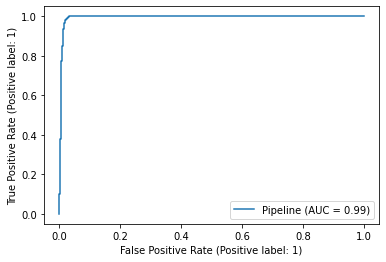

In [ ]:
plot_roc_curve(model1, X_train, y_train) 

Apropo, daca te simti inspirat(a) incearca sa aplici algoritmul de KNN si sa compari acuratetea celor doua metode.